In [2]:
#scrape data from worldometers.com 
#importing important modules and libraries


import pandas as pd
import seaborn as sn
import requests
from bs4 import BeautifulSoup

url = 'https://www.worldometers.info/coronavirus/'
req = requests.get(url)
page = BeautifulSoup(req.content, 'html.parser')

table = page.find_all('table', id="main_table_countries_today")[0]

df = pd.read_html(str(table), displayed_only=False)[0]

df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,North America,95371433,"+26,756",1416333.0,+446,67518072.0,"+121,566",26437028.0,11824.0,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Asia,121431852,"+591,778",1361891.0,"+1,669",110140490.0,"+327,236",9929471.0,30532.0,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,South America,54782891,"+43,882",1263558.0,+482,49163050.0,"+172,307",4356283.0,12915.0,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,160623436,"+444,092",1725973.0,"+1,799",140310312.0,"+887,442",18587151.0,13335.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Africa,11574533,"+1,709",250213.0,+86,10728754.0,"+21,226",595566.0,1663.0,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,NaN,Total:,160623436,"+444,092",1725973.0,"+1,799",140310312.0,"+887,442",18587151.0,13335.0,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,Total:,11574533,"+1,709",250213.0,+86,10728754.0,"+21,226",595566.0,1663.0,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,Total:,3875537,"+41,478",8074.0,+36,3402686.0,"+27,021",464777.0,167.0,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,Total:,721,NaN,15.0,NaN,706.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#check for missing data

df.isnull().sum()

#                       16
Country,Other            1
TotalCases               0
NewCases                81
TotalDeaths              9
NewDeaths              132
TotalRecovered           9
NewRecovered           101
ActiveCases              9
Serious,Critical        61
Tot Cases/1M pop        16
Deaths/1M pop           25
TotalTests              31
Tests/ 1M pop           31
Population              18
Continent                4
1 Caseevery X ppl       18
1 Deathevery X ppl      27
1 Testevery X ppl       31
New Cases/1M pop        95
New Deaths/1M pop      146
Active Cases/1M pop     22
dtype: int64

In [104]:
#create a new dataset
DS = df[['Continent', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']]
DS

,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,North America,95371433,1416333.0,67518072.0,26437028.0
1,Asia,121431852,1361891.0,110140490.0,9929471.0
2,South America,54782891,1263558.0,49163050.0,4356283.0
3,Europe,160623436,1725973.0,140310312.0,18587151.0
4,Africa,11574533,250213.0,10728754.0,595566.0
...,...,...,...,...,...
237,Europe,160623436,1725973.0,140310312.0,18587151.0
238,Africa,11574533,250213.0,10728754.0,595566.0
239,Australia/Oceania,3875537,8074.0,3402686.0,464777.0
240,NaN,721,15.0,706.0,0.0


In [105]:
#check for missing values

DS.isnull().sum()

Continent         4
TotalCases        0
TotalDeaths       9
TotalRecovered    9
ActiveCases       9
dtype: int64

In [106]:
#drop missing values(row/columns)

Datas= DS.dropna()
Datas

,Continent,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,North America,95371433,1416333.0,67518072.0,26437028.0
1,Asia,121431852,1361891.0,110140490.0,9929471.0
2,South America,54782891,1263558.0,49163050.0,4356283.0
3,Europe,160623436,1725973.0,140310312.0,18587151.0
4,Africa,11574533,250213.0,10728754.0,595566.0
...,...,...,...,...,...
236,South America,54782891,1263558.0,49163050.0,4356283.0
237,Europe,160623436,1725973.0,140310312.0,18587151.0
238,Africa,11574533,250213.0,10728754.0,595566.0
239,Australia/Oceania,3875537,8074.0,3402686.0,464777.0


In [114]:
#check if nans have been dropped successfully

Datas.isnull().sum()

Continent         0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
ActiveCases       0
dtype: int64

In [107]:
#descriptive statstics of the new dataset

Datas.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
count,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02
mean,1.008576e+07,1.347319e+05,8.597512e+06,1.353512e+06
std,4.746803e+07,6.315271e+05,4.044296e+07,6.704865e+06
min,1.000000e+01,1.000000e+00,6.000000e+00,0.000000e+00
25%,3.423700e+04,3.030000e+02,2.262400e+04,9.060000e+02
50%,2.639500e+05,2.830000e+03,1.922180e+05,1.051700e+04
75%,1.638228e+06,1.639800e+04,1.546429e+06,1.235550e+05
max,4.476604e+08,6.026057e+06,3.812641e+08,6.037028e+07


In [108]:
#check addtional information about the dataframe
Datas.info

<bound method DataFrame.info of              Continent  TotalCases  TotalDeaths  TotalRecovered  ActiveCases
0        North America    95371433    1416333.0      67518072.0   26437028.0
1                 Asia   121431852    1361891.0     110140490.0    9929471.0
2        South America    54782891    1263558.0      49163050.0    4356283.0
3               Europe   160623436    1725973.0     140310312.0   18587151.0
4               Africa    11574533     250213.0      10728754.0     595566.0
..                 ...         ...          ...             ...          ...
236      South America    54782891    1263558.0      49163050.0    4356283.0
237             Europe   160623436    1725973.0     140310312.0   18587151.0
238             Africa    11574533     250213.0      10728754.0     595566.0
239  Australia/Oceania     3875537       8074.0       3402686.0     464777.0
241                All   447660403    6026057.0     381264070.0   60370276.0

[221 rows x 5 columns]>

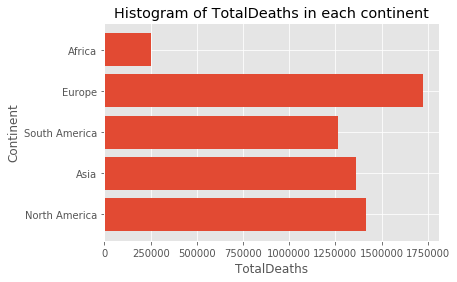

In [203]:
#an histogram to check for continet with most deaths caused by covid 19

plt.barh("Continent", 'TotalDeaths', data=Datas.head().reset_index())
plt.ylabel("Continent")
plt.xlabel('TotalDeaths')
plt.title('Histogram of TotalDeaths in each continent')
plt.show()

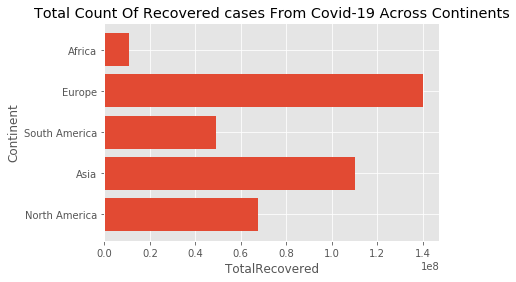

In [207]:
#a histogram tp check for continents with the most newly recovere cases from void 19
plt.barh("Continent", 'TotalRecovered', data=Datas.head().reset_index())
plt.ylabel("Continent")
plt.xlabel('TotalRecovered')
plt.title('Total Count Of Recovered cases From Covid-19 Across Continents')
plt.show()

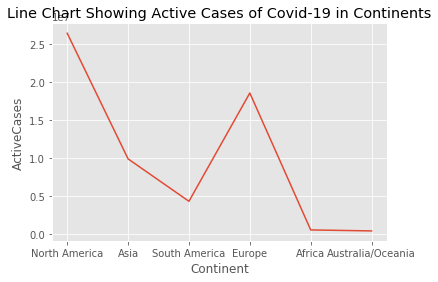

In [204]:
#plotting a chart to show the trend of covid-19

plt.plot("Continent", 'ActiveCases', data=Datas.head(6).reset_index())
plt.xlabel("Continent")
plt.ylabel('ActiveCases')
plt.title('Line Chart Showing Active Cases of Covid-19 in Continents')
plt.show()

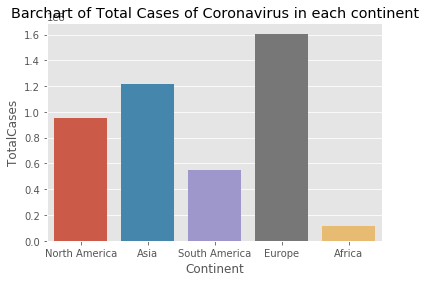

In [202]:
sn.barplot(x="Continent", y='TotalCases', data=Datas.head())
plt.title('Barchart of Total Cases of Coronavirus in each continent')
plt.show()